In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import os
import zarr
import re
import tifffile


In [3]:
from fuse_n5_xml_to_tif import get_tile_positions, fuse_channel_2_tiles

In [4]:
from pathlib import Path
# ----- File Paths -----
# base_path per OS
# macOS
# base_path = Path("/Users/thomasnegrello/mnt/tnegrell_ista/siegegrp/ThNe/development_retina/")
# Ubuntu
# base_path = Path("/mnt/gdrive/ThNe/development_retina/")
# Windows
# base_path = Path("Z:/siegegrp/ThNe/development_retina/")
#debian
base_path = Path("/run/user/1009/gvfs/smb-share:server=fs.ista.ac.at,share=drives/tnegrell/group/siegegrp/ThNe/development_retina/")

xml_folder = Path("raw_images_n5/")
file_name = Path("P10/F/L/retina_Age_P10_Sex_F_Side_L_Animal_2")

file_path = base_path / xml_folder / file_name

n5_path = file_path.with_suffix(".n5")
xml_path = file_path.with_suffix(".xml")


In [5]:
positions = get_tile_positions(xml_path)
 

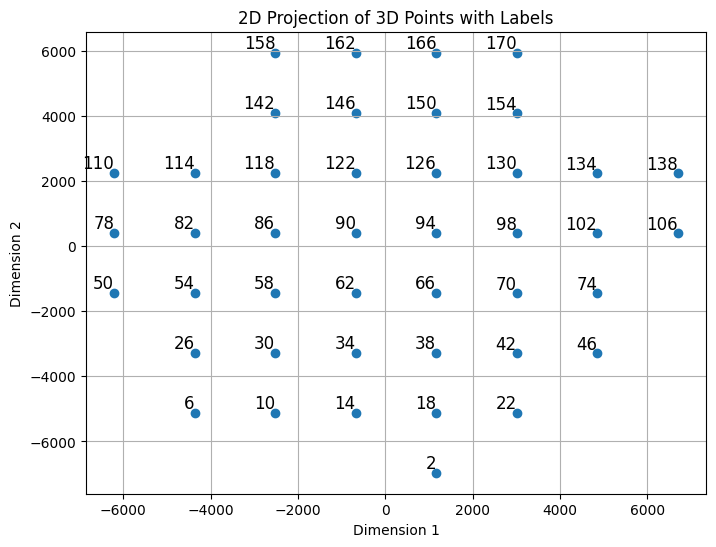

In [6]:
import matplotlib.pyplot as plt
points_dict = positions

# Extract x, y values and labels
x = [v[0] for v in points_dict.values()]
y = [v[1] for v in points_dict.values()]
labels = list(points_dict.keys())

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y)

# Add labels
for label, x_coord, y_coord in zip(labels, x, y):
    plt.text(x_coord, y_coord, label, fontsize=12, ha='right', va='bottom')

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('2D Projection of 3D Points with Labels')
plt.grid(True)
plt.show()

In [7]:
downsample_factor_xy = 3
downsample_factor_z = 2

In [ ]:
voxel_size = [0.9, 0.33902432, 0.33902432]  # Z, Y, X microns per pixel
fuse_folder = Path("trial_fuse/")
file_name = Path("microglia_Age_P10_Sex_F_Side_L_Animal_2_xy_{downsample_factor_xy}_z_{downsample_factor_z}.tif")

output_path = base_path / fuse_folder / file_name

fuse_channel_2_tiles(
    n5_path=n5_path,
    tile_positions=positions, 
    channel = 2,
    output_path=output_path,
    downsample_factor_xy=downsample_factor_xy,
    downsample_factor_z=downsample_factor_z
)



/home/tnegrell/Desktop/env_preprocess_img/lib/python3.9/site-packages/zarr/storage.py:179: FutureWarning: The N5Store is deprecated and will be removed in a Zarr-Python version 3, see https://github.com/zarr-developers/zarr-python/issues/1274 for more information.
  return N5Store(store)


Selected setups for channel 2: ['setup2', 'setup6', 'setup10', 'setup14', 'setup18', 'setup22', 'setup26', 'setup30', 'setup34', 'setup38', 'setup42', 'setup46', 'setup50', 'setup54', 'setup58', 'setup62', 'setup66', 'setup70', 'setup74', 'setup78', 'setup82', 'setup86', 'setup90', 'setup94', 'setup98', 'setup102', 'setup106', 'setup110', 'setup114', 'setup118', 'setup122', 'setup126', 'setup130', 'setup134', 'setup138', 'setup142', 'setup146', 'setup150', 'setup154', 'setup158', 'setup162', 'setup166', 'setup170']
43 tiles to process
Tile 1/43 of size (58, 683, 683) positioned
Tile 2/43 of size (58, 683, 683) positioned
Tile 3/43 of size (58, 683, 683) positioned
Tile 4/43 of size (58, 683, 683) positioned
Tile 5/43 of size (58, 683, 683) positioned
Tile 6/43 of size (58, 683, 683) positioned
Tile 7/43 of size (58, 683, 683) positioned
Tile 8/43 of size (58, 683, 683) positioned
Tile 9/43 of size (58, 683, 683) positioned
Tile 10/43 of size (58, 683, 683) positioned
Tile 11/43 of size